# Image Viewing
This notebook lets you see some images from our respective databases: the Scenic-or-Not database, from geograph.uk.org, and the Wikimedia database, which we gathered by ourselves.

## Imports and Paths

In [1]:
import os
import pandas as pd
from PIL import Image
from pathlib import Path

In [2]:
project_base_path = Path(os.getcwd()).parent
son_path = project_base_path / 'data' / 'external' / 'scenicornot' / 'scenicornot.metadata.csv'
wiki_path =  project_base_path / 'data' / 'processed' / 'wikimedia_commons' / 'ns6.parquet'

## Data Loading

In [3]:
origin = 'son' # choose 'son' or 'wiki'

if origin == 'son':
    image_folder = son_path.parent
    image_paths = pd.read_csv(son_path, usecols = ['filename']).loc[:, 'filename']
elif origin == 'wiki':
    image_folder = project_base_path
    image_paths = pd.read_parquet(wiki_path, columns = ['image_path']).loc[:, 'image_path']

## Functions

In [4]:
def show_random_image(image_folder: Path = image_folder, image_paths: pd.Series = image_paths) -> None:
    '''
    Given a base path and a pd.Series of paths, this function displays a
    random image from the Series, and prints the whole path.
    '''
    image_path = image_folder / Path(image_paths.sample().item())
    image = Image.open(image_path)

    print('Image path:', image_path, '\n')
    display(image)

## Display

Image path: /home/ubuntu/landscape-aesthetics/data/external/scenicornot/photos/55/11/551158_cbf36356.jpg 



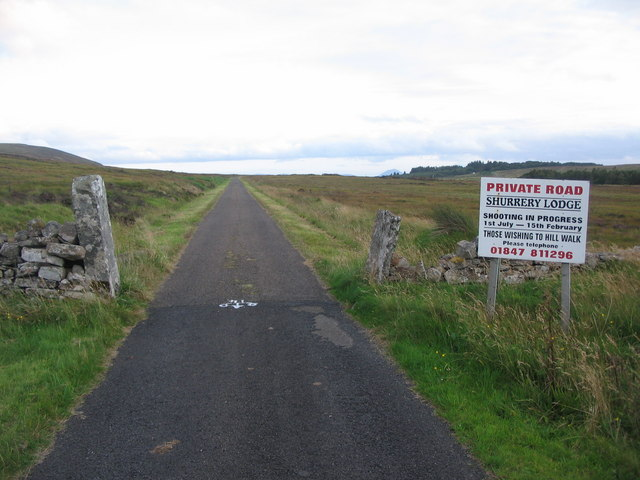

In [5]:
show_random_image()

## Common denominator of SoN images:
- Outdoors
- Photographer is standing on the ground (not from a plane, not from space)
- Vertically oriented
- Urban or rural, land or sea: no matter
- Might be picture of only one building
- Generous view of sorroundings, not a closeup

## Landscape Definitions
Possible definitions of landscape are:
- tangible and physically delineated areas on the Earth’s surface, or
- an area, as perceived by people,
  
both from _Trond Simensen, Rune Halvorsen, Lars Erikstad, "Methods for landscape characterisation and mapping: A systematic review"_